In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set settings for plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 500

In [2]:
# load the data from 1_4_results
profits = pd.read_csv('1_4_results/profits.csv')

In [3]:
# plot the profit distribution, differencing if last column = in ou out

profits_out = profits[profits['In_Out'] == 'Out']
profits_in = profits[profits['In_Out'] == 'In']

# get the mean and std of the profits in and out
mean_out = profits_out['Profit'].mean()
std_out = profits_out['Profit'].std()
mean_in = profits_in['Profit'].mean()
std_in = profits_in['Profit'].std()

# print the results
print('Mean profit for out trades:', mean_out)
print('Std profit for out trades:', std_out)
print('Mean profit for in trades:', mean_in)
print('Std profit for in trades:', std_in)

Mean profit for out trades: 44579.0249555789
Std profit for out trades: 86177.27626361238
Mean profit for in trades: 129743.68116920888
Std profit for in trades: 102356.38777768618


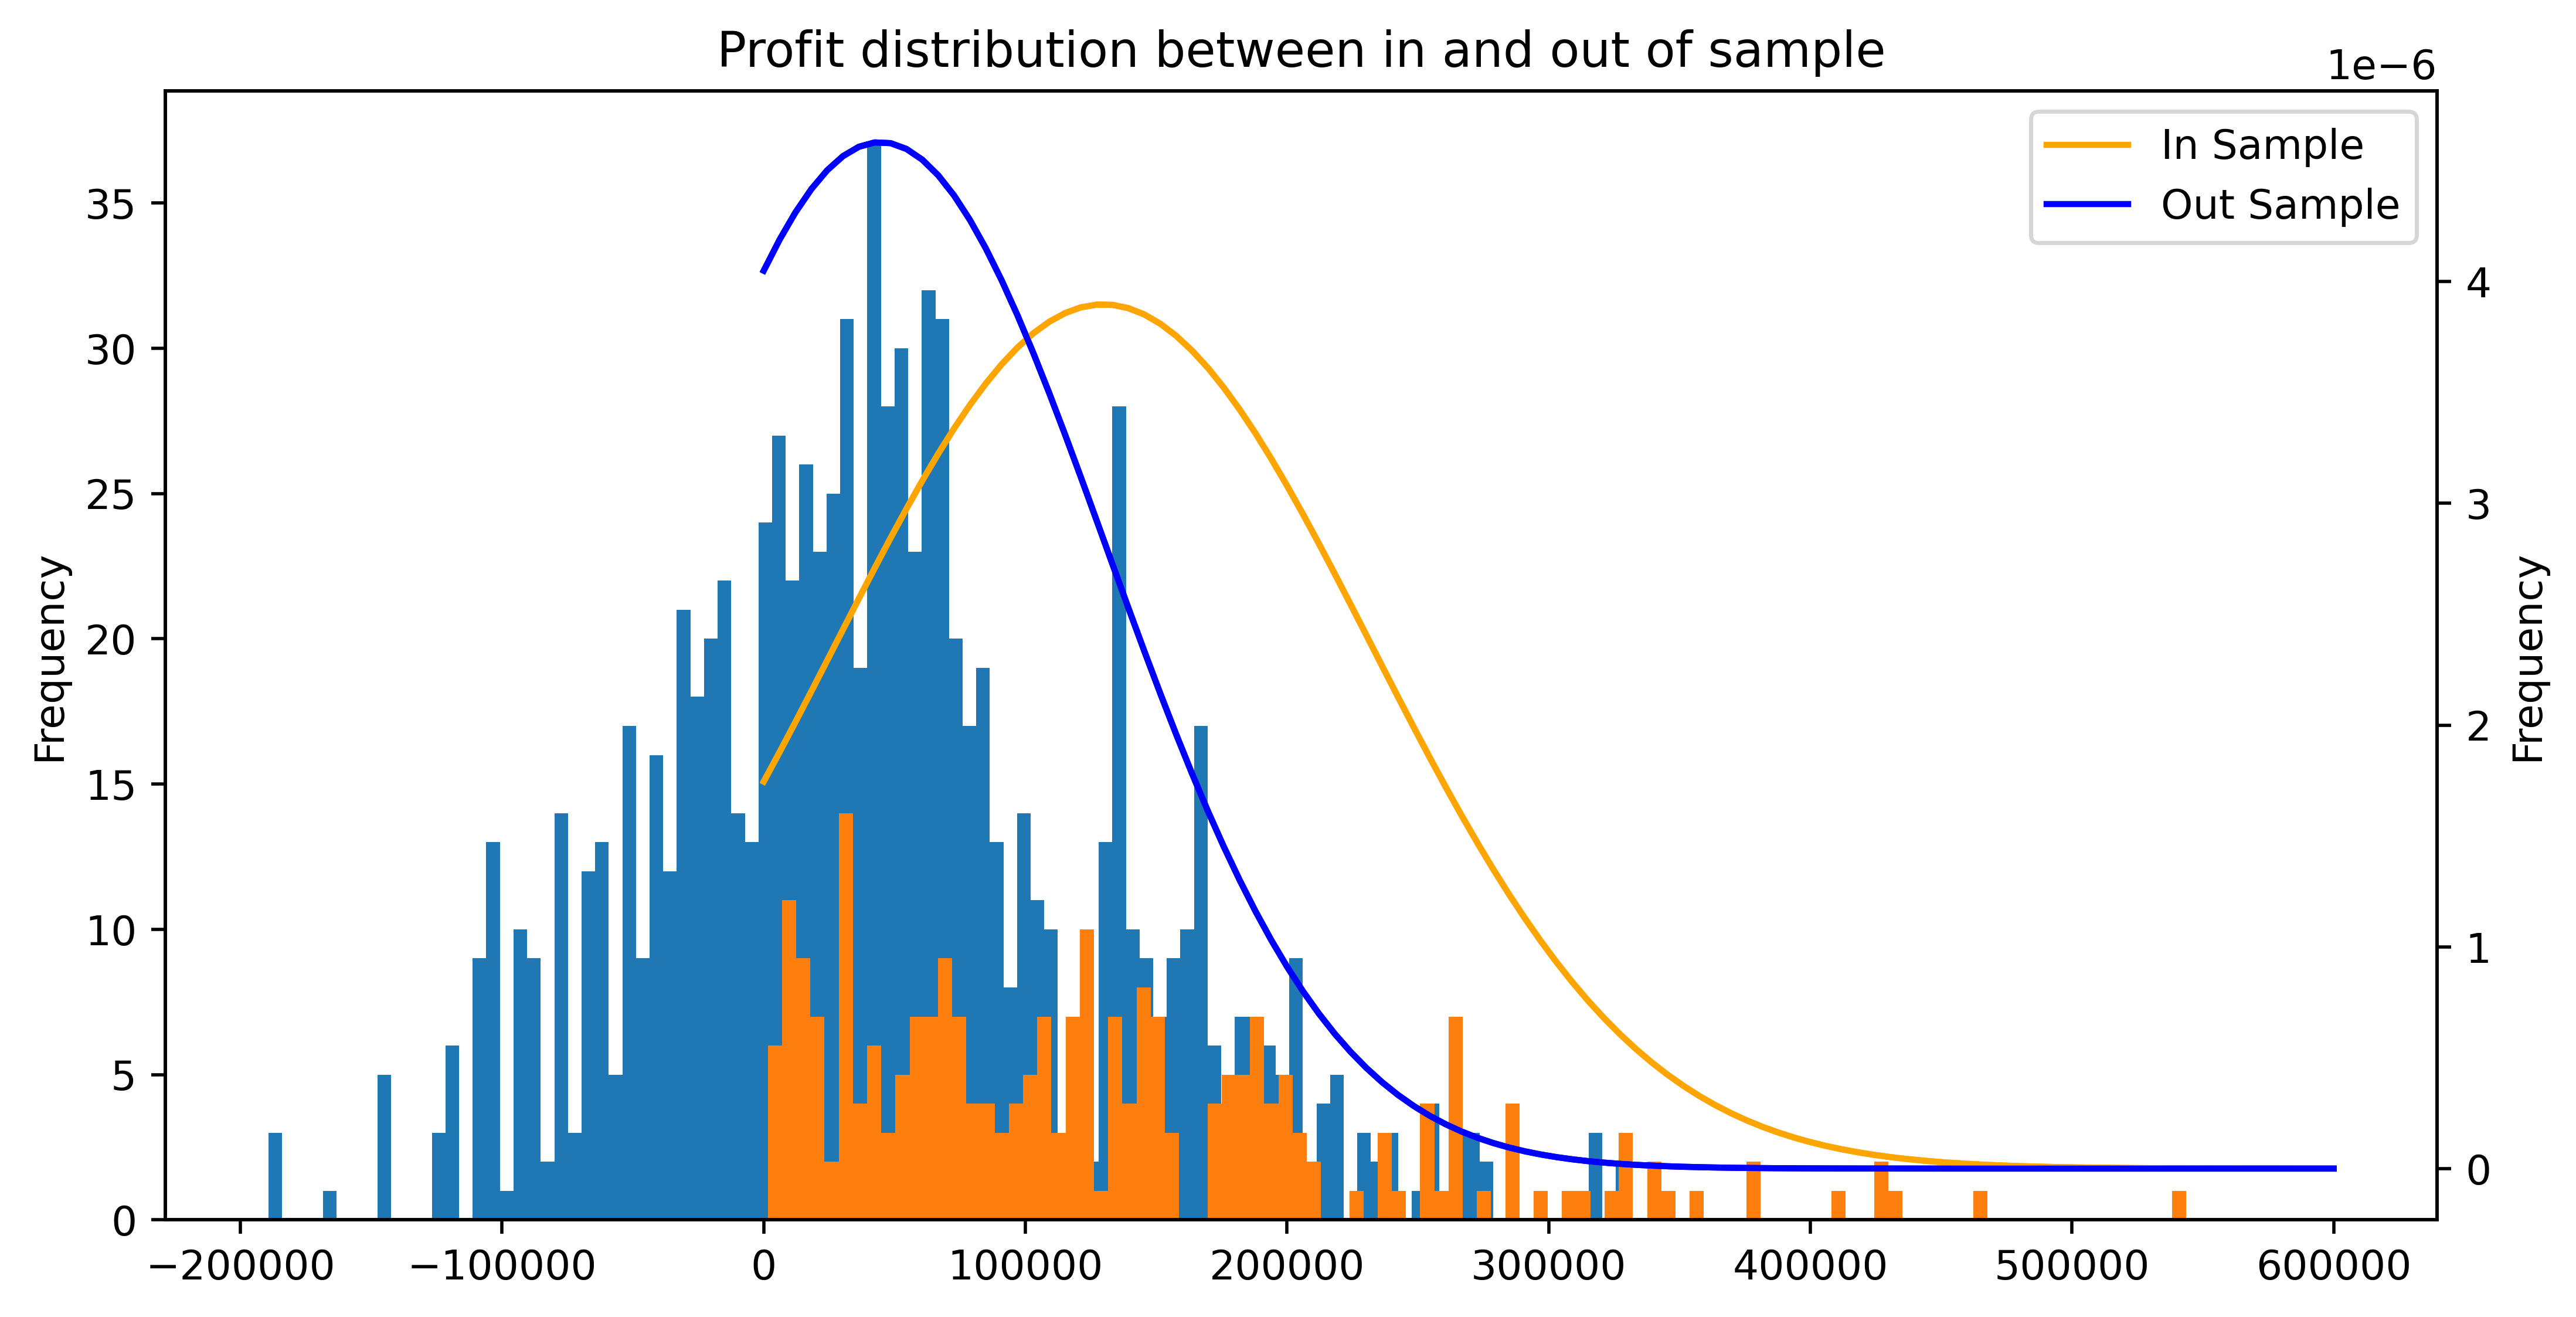

In [4]:
# plot the profits on the x axis and the scenarios on the y axis, and a bell curve with mean_in and std_in, with different scales
fig, ax1 = plt.subplots()
profits_out['Profit'].plot(kind='hist', bins=100, ax=ax1)
profits_in['Profit'].plot(kind='hist', bins=100, ax=ax1)
ax2 = ax1.twinx()
x = np.linspace(0, 600000, 100)
y_in = (1/(std_in*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean_in)/std_in)**2)
y_out = (1/(std_out*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean_out)/std_out)**2)
ax2.plot(x, y_in, 'orange')
ax2.plot(x, y_out, 'b')

# Add label for the bell curve plots
ax2.plot(x, y_in, 'orange', label='In Sample')
ax2.plot(x, y_out, 'b', label='Out Sample')

# Add the legend to the plot
ax2.legend(loc='upper right')

plt.title('Profit distribution between in and out of sample')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()